In [128]:
### IMport libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as s

In [129]:
torch.manual_seed(1)

In [130]:
# Hyper-parameters
input_size = 784 # 28x28
#batch_size = 64

def test_train_data(train_bs,test_bs):
  # Define transformations for the data
    transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

    # Load the dataset
    train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
    train_loader = DataLoader(train_dataset, batch_size=train_bs, shuffle=True)

    test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
    test_loader = DataLoader(test_dataset, batch_size=test_bs, shuffle=False)

    return (train_loader, test_loader)


In [131]:
## Model 1
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [132]:
def train_model(model, optimizer, train_loader, criterion):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data.view(-1, 784))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

In [133]:
def loss_model(model, loader, criterion):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = criterion(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
        tl = costTotal / costCounter
        acu =round(correct/total, 3)
    return tl,acu

In [135]:
n_epo = 20
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
def train_test_model(model, optimizer):
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, n_epo +1):
        train_model(model, optimizer, train_loader, criterion)

        train_loss, train_acc = loss_model(model, train_loader, criterion)
        test_loss, test_acc = loss_model(model, test_loader, criterion)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f" Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    return train_losses,test_losses, train_accuracies, test_accuracies


**batch sizes 120 v 32; lr= 1e-3**

In [136]:
###  model 1-------> train batch size= 120, test batch size = 32
model1 = Model1()
criterion = nn.CrossEntropyLoss()
train_loader, test_loader = test_train_data(120, 120)
optimizer1 = optim.Adam(model1.parameters(), lr = 1e-3, weight_decay = 1e-4)
model1_params = sum(p.numel() for p in model1.parameters())
print(f'Nunber of parameter for model 1 is: {model1_params}')
loss_train1, loss_test1, acc_train1, acc_test1 = train_test_model(model1, optimizer1)
param_1 = torch.nn.utils.parameters_to_vector(model1.parameters())



###  model 2 -------> train batch size= 120, test batch size = 32
model2 = Model1()
criterion = nn.CrossEntropyLoss()
train_loader, test_loader = test_train_data(32, 32)
optimizer2 = optim.Adam(model2.parameters(), lr = 1e-3, weight_decay = 1e-4)
model1_params = sum(p.numel() for p in model2.parameters())
print(f'Nunber of parameter for model 2 is: {model1_params}')
loss_train2, loss_test2, acc_train2, acc_test2 = train_test_model(model2, optimizer2)
param_2 = torch.nn.utils.parameters_to_vector(model2.parameters())

Nunber of parameter for model 1 is: 52650
 Train Loss: 0.3210, Test Loss: 0.3119
 Train Loss: 0.2473, Test Loss: 0.2489
 Train Loss: 0.2054, Test Loss: 0.2059
 Train Loss: 0.1703, Test Loss: 0.1751
 Train Loss: 0.1498, Test Loss: 0.1600
 Train Loss: 0.1402, Test Loss: 0.1579
 Train Loss: 0.1290, Test Loss: 0.1498
 Train Loss: 0.1082, Test Loss: 0.1309
 Train Loss: 0.1166, Test Loss: 0.1408
 Train Loss: 0.0941, Test Loss: 0.1186
 Train Loss: 0.0949, Test Loss: 0.1280
 Train Loss: 0.0919, Test Loss: 0.1212
 Train Loss: 0.0773, Test Loss: 0.1133
 Train Loss: 0.0822, Test Loss: 0.1201
 Train Loss: 0.0671, Test Loss: 0.1061
 Train Loss: 0.0611, Test Loss: 0.1017
 Train Loss: 0.0674, Test Loss: 0.1063
 Train Loss: 0.0626, Test Loss: 0.1017
 Train Loss: 0.0528, Test Loss: 0.0980
 Train Loss: 0.0571, Test Loss: 0.1025
Nunber of parameter for model 2 is: 52650
 Train Loss: 0.2558, Test Loss: 0.2519
 Train Loss: 0.1904, Test Loss: 0.1915
 Train Loss: 0.1446, Test Loss: 0.1529
 Train Loss: 0.1286

In [144]:
# loss_train2

In [154]:
# loss_train1

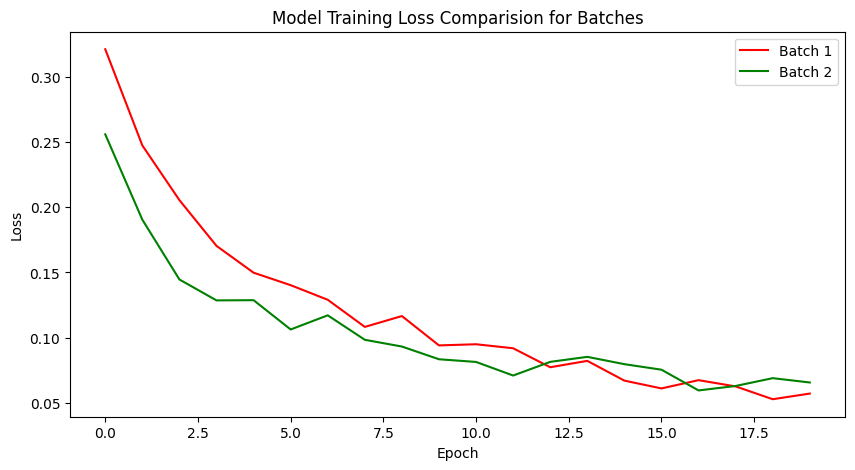

In [155]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, 20, 1), loss_train1[:20], color = "r")
plt.plot(np.arange(0, 20, 1), loss_train2[-20:],  color = "g")
plt.title('Model Training Loss Comparision for Batches')
plt.legend(['Batch 1', 'Batch 2'], loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

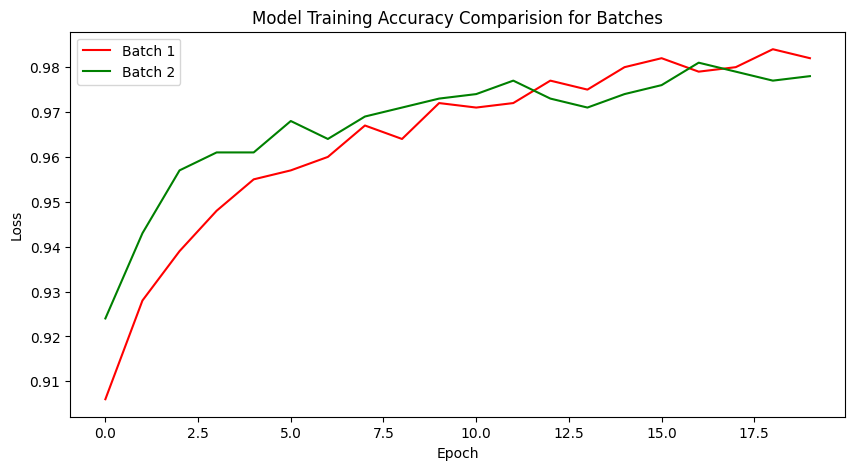

In [145]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, 20, 1), acc_train1[:20], color = "r")
plt.plot(np.arange(0, 20, 1), acc_train2[-20:], color = "g")
plt.title('Model Training Accuracy Comparision for Batches')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [164]:
# loss_test2

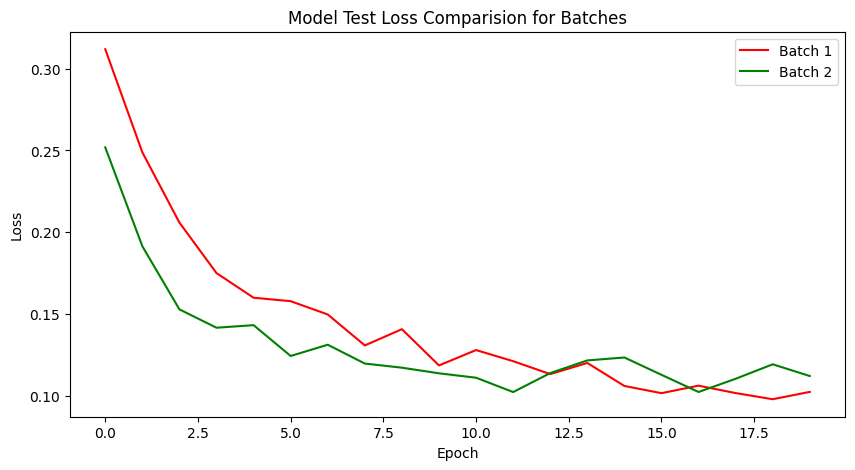

In [167]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, 20, 1), loss_test1[:20], color = "r")
plt.plot(np.arange(0, 20, 1), loss_test2[-20:],  color = "g")
plt.title('Model Test Loss Comparision for Batches')
plt.legend(['Batch 1', 'Batch 2'], loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**Interpolation Plot for Case 1**

In [171]:
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*param_1 + alpha[i]* param_2
    thetaArr.append(theta)

In [172]:
case1_train_loss = []
case1_test_loss = []
case1_train_acc = []
case1_test_acc = []
for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* param_1 + alpha[i]*param_2
    model1 = Model1()
    torch.nn.utils.vector_to_parameters(theta, model1.parameters())
    criterion = nn.CrossEntropyLoss()

    temp = []
    for param in model1.parameters():
        temp.append(torch.numel(param))

    train_loss_c1, train_acc_c1 = loss_model(model1, train_loader, criterion)
    test_loss_c1, test_acc_c1 = loss_model(model1, test_loader, criterion)
    case1_train_loss.append(train_loss_c1)
    case1_train_acc.append(train_acc_c1)
    case1_test_loss.append(test_loss_c1)
    case1_test_acc.append(test_acc_c1)

**Case 2: Batches Sizes = 120 v 32 :  Learning Rate = 1e-5**

In [106]:
###  model 1-------> train batch size= 120, test batch size = 120
model_1 = Model1()
criterion = nn.CrossEntropyLoss()
train_loader, test_loader = test_train_data(120, 120)
new_optimizer1 = optim.Adam(model1.parameters(), lr = 1e-5, weight_decay = 1e-4)
model1_params = sum(p.numel() for p in model1.parameters())
print(f'Nunber of parameter for model 1 is: {model1_params}')
new_loss_train1, new_loss_test1, new_acc_train1, new_acc_test1 = train_test_model(model1, new_optimizer1)
newparam_1 = torch.nn.utils.parameters_to_vector(model1.parameters())



###  model 2 -------> train batch size= 32, test batch size = 32
model_2 = Model1()
criterion = nn.CrossEntropyLoss()
train_loader, test_loader = test_train_data(32, 32)
new_optimizer2 = optim.Adam(model2.parameters(), lr = 1e-5, weight_decay = 1e-4)
model1_params = sum(p.numel() for p in model2.parameters())
print(f'Nunber of parameter for model 2 is: {model1_params}')
new_loss_train2, new_loss_test2, new_acc_train2, new_acc_test2 = train_test_model(model2, new_optimizer2)
new_param_2 = torch.nn.utils.parameters_to_vector(model2.parameters())

Nunber of parameter for model 1 is: 52650
 Train Loss: 15.0691, Test Loss: 15.6969
 Train Loss: 11.2594, Test Loss: 11.8687
Nunber of parameter for model 2 is: 52650
 Train Loss: 0.1306, Test Loss: 0.1389
 Train Loss: 0.1295, Test Loss: 0.1384


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, 2, 1), new_acc_test1[:2], color = "r")
plt.plot(np.arange(0, 2, 1), new_acc_test2[-2:], color = "g")
plt.title('Model Test Accuracy Comparision for Batches')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**Interpolation Plot for Case 2: lr=1e-5**

In [113]:
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])* newparam_1 + alpha[i]*new_param_2
    thetaArr.append(theta)

In [114]:
case2_train_loss = []
case2_test_loss = []
case2_train_acc = []
case2_test_acc = []
for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* newparam_1 + alpha[i]*new_param_2
    model = Model1()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    criterion = nn.CrossEntropyLoss()

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    train_loss_c2, train_acc_c2 = loss_model(model, train_loader, criterion)
    test_loss_c2,  test_acc_c2 = loss_model(model, train_loader, criterion)
    case2_train_loss.append(train_loss_c2)
    case2_train_acc.append(train_acc_c2)
    case2_test_loss.append(test_loss_c2)
    case2_test_acc.append(test_acc_c2)

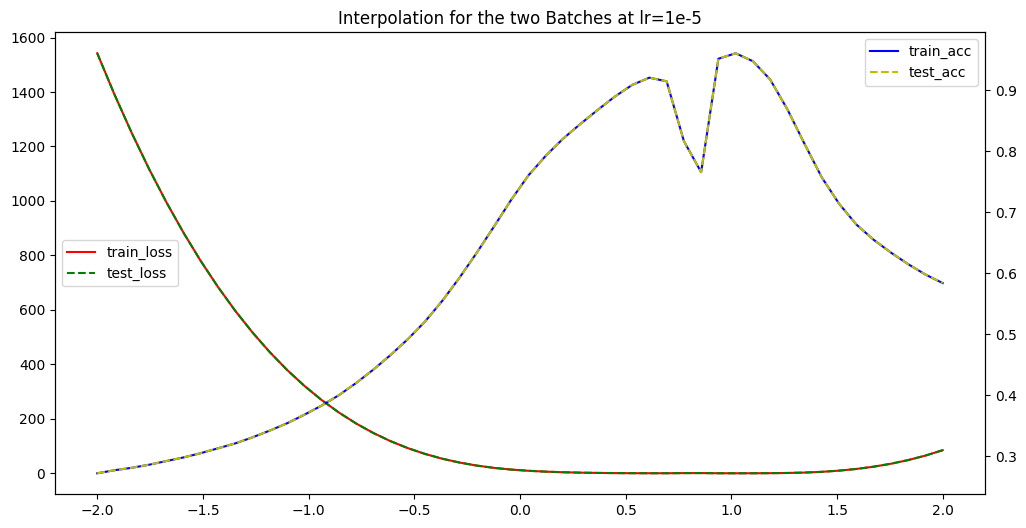

In [126]:
plt.figure(figsize=(12,6))
plt.plot(alpha, case2_train_loss, color = "r")
plt.plot(alpha, case2_test_loss, color = "g",linestyle='--')
plt.legend(['train_loss' , 'test_loss'] , loc='center left')
plt.title('Interpolation for the two Batches at lr=1e-5')

plt.twinx()

plt.plot(alpha, case2_train_acc, color = "b")
plt.plot(alpha, case2_test_acc, color = "y",linestyle='--')
plt.legend(['train_acc' , 'test_acc'], loc='upper right')